In [299]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data/updated_combined.csv')
df = df.dropna()

In [300]:
sentences = df['text'].tolist()

Average length of sentences: 17.95076839385285
Maximum length of sentences: 142
Minimum length of sentences: 1


(array([3.320e+02, 1.481e+03, 1.875e+03, 1.858e+03, 1.696e+03, 1.102e+03,
        1.464e+03, 1.097e+03, 7.770e+02, 5.940e+02, 5.430e+02, 3.410e+02,
        5.350e+02, 4.650e+02, 2.710e+02, 1.440e+02, 4.900e+01, 2.400e+01,
        1.900e+01, 7.000e+00, 1.200e+01, 6.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   3.82,   6.64,   9.46,  12.28,  15.1 ,  17.92,  20.74,
         23.56,  26.38,  29.2 ,  32.02,  34.84,  37.66,  40.48,  43.3 ,
         46.12,  48.94,  51.76,  54.58,  57.4 ,  60.22,  63.04,  65.86,
         68.68,  71.5 ,  74.32,  77.14,  79.96,  82.78,  85.6 ,  88.42,
         91.24,  94.06,  96.88,  99.7 , 102.52, 105.34, 108.16, 110.98,
        113.8 , 

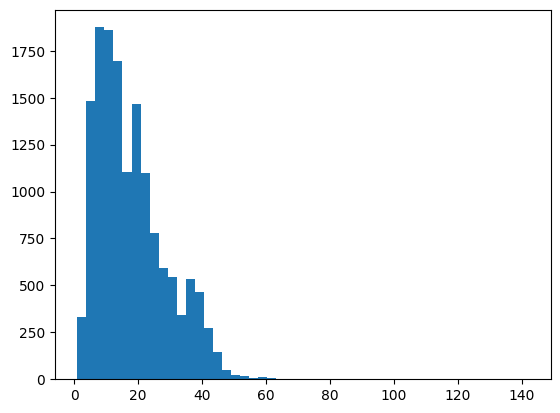

In [301]:
# finding the average length of the sentences
avg_len = sum([len(sentence.split()) for sentence in sentences]) / len(sentences)
max_len = max([len(sentence.split()) for sentence in sentences])
min_len = min([len(sentence.split()) for sentence in sentences])

print(f'Average length of sentences: {avg_len}')
print(f'Maximum length of sentences: {max_len}')
print(f'Minimum length of sentences: {min_len}')

# finding the distribution of the length of the sentences
plt.hist([len(sentence.split()) for sentence in sentences], bins=50)

In [302]:
# encoding
num_words = 1250
embedding_dim = 16
max_length = 36
truncate_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

# splitting the data
split = 0.9
split_index = int(split * len(padded))

training_sequences = padded[:split_index]
testing_sequences = padded[split_index:]

training_labels = df['sentiment'].tolist()[:split_index]
testing_labels = df['sentiment'].tolist()[split_index:]

In [322]:
# defining initial model
l2_regularizer = tf.keras.regularizers.l2(0.01)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(32, 2, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build()
history = model.fit(training_sequences, np.array(training_labels), epochs=55, validation_data=(testing_sequences, np.array(testing_labels)), callbacks=[early_stopping])

Epoch 1/55


c:\Users\fauza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


414/414 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5811 - loss: 0.7296 - val_accuracy: 0.7954 - val_loss: 0.5294
Epoch 2/55
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7875 - loss: 0.5122 - val_accuracy: 0.8219 - val_loss: 0.4282
Epoch 3/55
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.4336 - val_accuracy: 0.8423 - val_loss: 0.3918
Epoch 4/55
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.3880 - val_accuracy: 0.8511 - val_loss: 0.3857
Epoch 5/55
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.3737 - val_accuracy: 0.8518 - val_loss: 0.3745
Epoch 6/55
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8576 - loss: 0.3715 - val_accuracy: 0.8484 - val_loss: 0.3690
Epoch 7/55
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3616 - val_accuracy: 0.8477 - val_loss: 0.3634
Epoch 8/55
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.3518 - val_accuracy: 0.8498 - val_

In [326]:
best_epoch = np.argmin(history.history['val_loss']) + 1  # +1 because epochs are 1-indexed
best_val_loss = history.history['val_loss'][best_epoch - 1]  # accessing the minimum val_loss

print(f"Best epoch: {best_epoch}")
print(f"Validation loss at best epoch: {best_val_loss}")

# print the val acc and acc
val_acc = history.history['val_accuracy'][best_epoch - 1]
acc = history.history['accuracy'][best_epoch - 1]
print(f"Validation accuracy: {val_acc}")
print(f"Training accuracy: {acc}")


Best epoch: 21
Validation loss at best epoch: 0.3502938449382782
Validation accuracy: 0.845683217048645
Training accuracy: 0.8773705959320068


In [265]:
def plot_session(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting the loss
    axes[0].plot(history.history['loss'], label='train_loss')
    axes[0].plot(history.history['val_loss'], label='val_loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].set_title('Training and Validation Loss')

    # Plotting the accuracy
    axes[1].plot(history.history['accuracy'], label='train_accuracy')
    axes[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].set_title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()


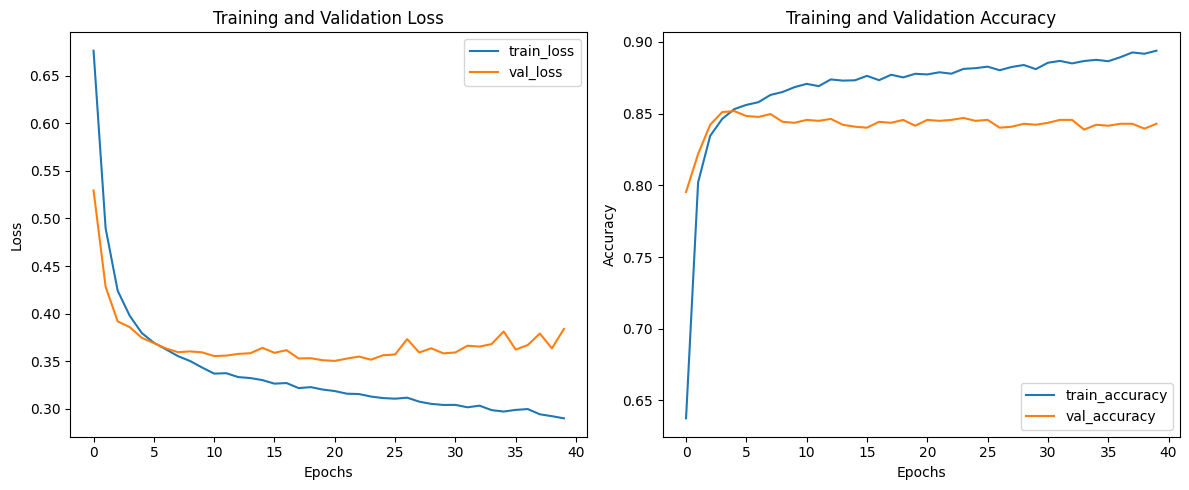

In [325]:
plot_session(history)

In [327]:
# return: (prediction, probability) (deket 0: not toxic, deket 1: toxic))
def infer(tokenizer, model, sentence, max_length, padding_type, truncate_type):
    # lower the text
    sentence = sentence.lower()
    sequences = tokenizer.texts_to_sequences([sentence])
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

    prob_num = model.predict(padded)[0][0] 
    if prob_num > 0.6 :
        return 'Toxic',prob_num
    else:
        return 'Not Toxic',prob_num

In [328]:
# trying to predict the sentiment of a sentence
eval_sentence = ['']
eval_sequence = tokenizer.texts_to_sequences(eval_sentence)
eval_padded = pad_sequences(eval_sequence, maxlen=max_length, padding=padding_type, truncating=truncate_type)

model.predict(eval_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.12725154]], dtype=float32)

In [333]:
infer(tokenizer, model, '', max_length, padding_type, truncate_type)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


('Toxic', 0.9622251)

In [334]:
# save to h5
model.save('model_toxic_classification.h5')

In [335]:
import pickle

# Save the tokenizer to a pickle file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)